## Ans 2

In [73]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import matplotlib
import math

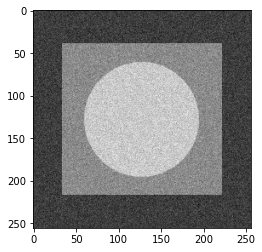

In [4]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# read the image of a plant seedling as grayscale from the outset
image = skimage.io.imread(fname='Fig1.tif')

# display the image
plt.imshow(image, cmap='gray')
plt.show()

In [26]:
image.max()

255

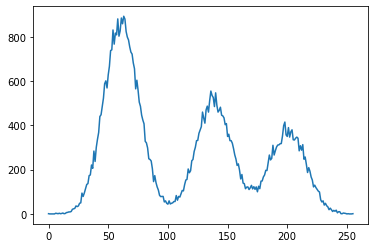

In [30]:
histr = cv.calcHist([image],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

It is clear from the histogram that the image has Gaussian noise.
The probability density function is:
$\frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(z-\bar{z})^{2}}{2 \sigma^{2}}}-\infty<z<\infty$

(50, 50)


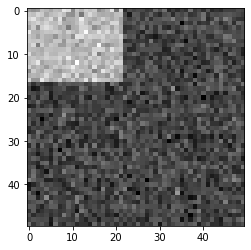

In [46]:
I_cropped = image[200:250, 200:250]
print(I_cropped.shape)
plt.imshow(I_cropped, cmap = 'gray')

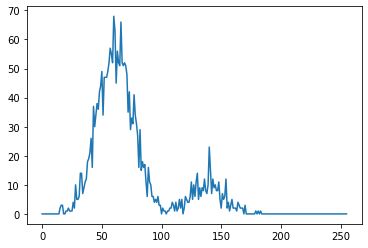

In [48]:
histr = cv.calcHist([I_cropped],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

Here, $\frac{1}{\sqrt{2 \pi} \sigma}$ = 60 and mean is approximately 60


In [59]:
variance = (1/(math.sqrt(2*math.pi)*60))**2
variance

4.420970641441538e-05

### Harmonic Mean filter

Text(0.5, 1.0, 'harmonicmean  3*3 kernel')

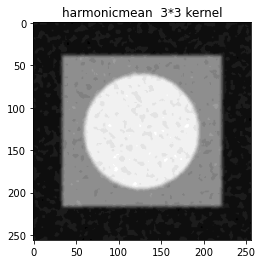

In [75]:
rows, cols = box.shape[:2]
ksize = 3
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(box, *[padsize]*4, cv2.BORDER_DEFAULT)
kernel = np.ones((3,3), np.float32)/9
box = cv2.filter2D(image, -1, kernel)
harmonicmean = np.zeros_like(box)
for r in range(rows):
    for c in range(cols):
        harmonicmean[r, c] = 1/np.sum(1/pad_img[r:r+ksize, c:c+ksize])
harmonicmean = harmonicmean*ksize**2
plt.imshow(harmonicmean, cmap = 'gray')
plt.title('harmonicmean  3*3 kernel')

## Ans 3

In [77]:
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D

# define input image
image = np.array([[255, 40, 103, 134],[95, 39, 56, 67],[48, 28, 39, 51],[24, 12, 17, 21]])
image = image.reshape(1, 4, 4, 1)

# define model containing just a single max pooling layer
model = Sequential([MaxPooling2D(pool_size = 2, strides = 1)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


[[255 103 134]
 [ 95  56  67]
 [ 48  39  51]]


In [84]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import AveragePooling2D

# define input image
image = np.array([[255, 40, 103, 134],[95, 39, 56, 67],[48, 28, 39, 51],[24, 12, 17, 21]])
image = image.reshape(1, 4, 4, 1)

image = tf.cast(x=image, dtype=tf.float32)
# define model containing just a single average pooling layer
model = Sequential([AveragePooling2D(pool_size = 2, strides = 2)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


[[107.25  90.  ]
 [ 28.    32.  ]]


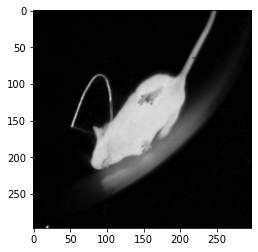

In [92]:
img = cv2.imread(r"C:\Users\Anuradha Mahato\Documents\New folder\DIPAssessment-3_images\DIPAssessment-3_images\Q5mouse.png",0)
plt.imshow(img)

In [94]:
im.max()

134

In [96]:
from skimage.measure import label, regionprops
import skimage.io as io
im = io.imread(r"C:\Users\Anuradha Mahato\Documents\New folder\DIPAssessment-3_images\DIPAssessment-3_images\Q5mouse.png")
bw = im[:,:,0] > 50
regions = regionprops(bw.astype(int))
print(regions[0].perimeter)

1096.7798333582164


## SVD

In [ ]:
U, S, Vh = np.linalg.svd(a)
M = Vh[-1,:]
M = np.reshape(M, (3,4))

## RANSAC

Ground truth:
Scale: (0.9000, 0.9000), Translation: (-10.0000, 20.0000), Rotation: -0.2000
Affine transform:
Scale: (0.9015, 0.8913), Translation: (-9.3136, 14.9768), Rotation: -0.1678
RANSAC:
Scale: (0.8999, 0.9001), Translation: (-10.0005, 19.9744), Rotation: -0.1999


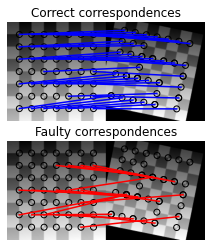

In [76]:
import numpy as np
from matplotlib import pyplot as plt

from skimage import data
from skimage.util import img_as_float
from skimage.feature import (corner_harris, corner_subpix, corner_peaks,
                             plot_matches)
from skimage.transform import warp, AffineTransform
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.measure import ransac


# generate synthetic checkerboard image and add gradient for the later matching
checkerboard = img_as_float(data.checkerboard())
img_orig = np.zeros(list(checkerboard.shape) + [3])
img_orig[..., 0] = checkerboard
gradient_r, gradient_c = (np.mgrid[0:img_orig.shape[0],
                                   0:img_orig.shape[1]]
                          / float(img_orig.shape[0]))
img_orig[..., 1] = gradient_r
img_orig[..., 2] = gradient_c
img_orig = rescale_intensity(img_orig)
img_orig_gray = rgb2gray(img_orig)

# warp synthetic image
tform = AffineTransform(scale=(0.9, 0.9), rotation=0.2, translation=(20, -10))
img_warped = warp(img_orig, tform.inverse, output_shape=(200, 200))
img_warped_gray = rgb2gray(img_warped)

# extract corners using Harris' corner measure
coords_orig = corner_peaks(corner_harris(img_orig_gray), threshold_rel=0.001,
                           min_distance=5)
coords_warped = corner_peaks(corner_harris(img_warped_gray),
                             threshold_rel=0.001, min_distance=5)

# determine sub-pixel corner position
coords_orig_subpix = corner_subpix(img_orig_gray, coords_orig, window_size=9)
coords_warped_subpix = corner_subpix(img_warped_gray, coords_warped,
                                     window_size=9)


def gaussian_weights(window_ext, sigma=1):
    y, x = np.mgrid[-window_ext:window_ext+1, -window_ext:window_ext+1]
    g = np.zeros(y.shape, dtype=np.double)
    g[:] = np.exp(-0.5 * (x**2 / sigma**2 + y**2 / sigma**2))
    g /= 2 * np.pi * sigma * sigma
    return g


def match_corner(coord, window_ext=5):
    r, c = np.round(coord).astype(np.intp)
    window_orig = img_orig[r-window_ext:r+window_ext+1,
                           c-window_ext:c+window_ext+1, :]

    # weight pixels depending on distance to center pixel
    weights = gaussian_weights(window_ext, 3)
    weights = np.dstack((weights, weights, weights))

    # compute sum of squared differences to all corners in warped image
    SSDs = []
    for cr, cc in coords_warped:
        window_warped = img_warped[cr-window_ext:cr+window_ext+1,
                                   cc-window_ext:cc+window_ext+1, :]
        SSD = np.sum(weights * (window_orig - window_warped)**2)
        SSDs.append(SSD)

    # use corner with minimum SSD as correspondence
    min_idx = np.argmin(SSDs)
    return coords_warped_subpix[min_idx]


# find correspondences using simple weighted sum of squared differences
src = []
dst = []
for coord in coords_orig_subpix:
    src.append(coord)
    dst.append(match_corner(coord))
src = np.array(src)
dst = np.array(dst)


# estimate affine transform model using all coordinates
model = AffineTransform()
model.estimate(src, dst)

# robustly estimate affine transform model with RANSAC
model_robust, inliers = ransac((src, dst), AffineTransform, min_samples=3,
                               residual_threshold=2, max_trials=100)
outliers = inliers == False


# compare "true" and estimated transform parameters
print("Ground truth:")
print(f'Scale: ({tform.scale[1]:.4f}, {tform.scale[0]:.4f}), '
      f'Translation: ({tform.translation[1]:.4f}, '
      f'{tform.translation[0]:.4f}), '
      f'Rotation: {-tform.rotation:.4f}')
print("Affine transform:")
print(f'Scale: ({model.scale[0]:.4f}, {model.scale[1]:.4f}), '
      f'Translation: ({model.translation[0]:.4f}, '
      f'{model.translation[1]:.4f}), '
      f'Rotation: {model.rotation:.4f}')
print("RANSAC:")
print(f'Scale: ({model_robust.scale[0]:.4f}, {model_robust.scale[1]:.4f}), '
      f'Translation: ({model_robust.translation[0]:.4f}, '
      f'{model_robust.translation[1]:.4f}), '
      f'Rotation: {model_robust.rotation:.4f}')

# visualize correspondence
fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

inlier_idxs = np.nonzero(inliers)[0]
plot_matches(ax[0], img_orig_gray, img_warped_gray, src, dst,
             np.column_stack((inlier_idxs, inlier_idxs)), matches_color='b')
ax[0].axis('off')
ax[0].set_title('Correct correspondences')

outlier_idxs = np.nonzero(outliers)[0]
plot_matches(ax[1], img_orig_gray, img_warped_gray, src, dst,
             np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
ax[1].axis('off')
ax[1].set_title('Faulty correspondences')

plt.show()